In [22]:
import matplotlib.pyplot as plt
import numpy as np
from jfingerprint.indexing import *
from jfingerprint.plotting import *
import pickle

gallery_dataset = {"path": "/data/gallery/", "img_path": "images/", "patch_path": "patches/", "mnt_path": "mnts/", "features_path": "features/ResNet18_1013_213017/"}
queries_dataset = {"path": "/data/query_basep/", "img_path": "images/", "patch_path": "patches/", "mnt_path": "mnts/", "features_path": "features/ResNet18_1013_213017/"}

QDS = load_dataset_names(queries_dataset)
GDS = load_dataset_names(gallery_dataset)

In [23]:
# Função para extrair o identificador antes de "-"
def get_identifier(value):
    return value.split('-')[0]

In [24]:
# Ler o arquivo full_search.txt
with open('data/full_search.txt', 'r') as file:
    lines = file.readlines()

query_results = {}
current_query = None

# Parse o conteúdo do arquivo
for line in lines:
    line = line.strip()
    if line.startswith("Query:"):
        current_query = int(line.split(":")[1].strip())
        query_results[current_query] = []
    elif line.startswith("Sample:"):
        sample_info = line.split("|")
        sample_id = int(sample_info[0].split(":")[1].strip())
        score = float(sample_info[1].split(":")[1].strip())
        query_results[current_query].append((sample_id, score))

# Analisar os resultados
rank_counts = [0] * 10  # Contador para ranks 1 a 10

for query, samples in query_results.items():
    query_id = get_identifier(QDS[query])
    for rank, (sample, score) in enumerate(samples):
        sample_id = get_identifier(GDS[sample])
        if query_id == sample_id:
            if rank < 10:
                rank_counts[rank] += 100/len(query_results)
            break

In [25]:
sum(rank_counts[:3])

90.35714285714272

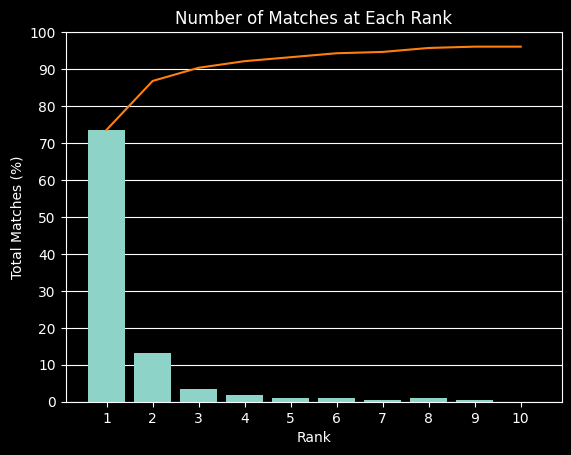

In [26]:
# Criar o gráfico
ranks = list(range(1, 11))
cumsum = np.cumsum(rank_counts)
plt.bar(ranks, rank_counts)
plt.plot(ranks, cumsum, color='tab:orange')

plt.xlabel('Rank')
plt.ylabel('Total Matches (%)')
plt.title('Number of Matches at Each Rank')
plt.xticks(ranks)
plt.ylim([0, 100])
plt.yticks(np.arange(0, 101, 10))
# hide grid behind bars
plt.grid(axis='y')
plt.gca().set_axisbelow(True)
plt.show()